<a href="https://colab.research.google.com/github/EAFIT-BI/Business-Analytics---2025-I/blob/main/Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naïve Bayes

El modelo de clasificación de Naïve Bayes, tiene su base en el teorema de Bayes en donde asume que las variables son independientes (por ello el nombre de ingenuo). La etiqueta de clase se asigna de acuerdo a la probabilidad *a posteriori* asi:

$$P(Y|X) = \frac{P(Y)P(X|Y)}{P(X)}$$,

en donde:

- $P(Y|X)$ es la probabilidad de una etiqueta de clase $Y$ dadas las variables de entrada $X$.
- $P(Y)$ es la probabilidad *a priori* y representa el conocimiento que tengo sobre la distribución de las clases.
- $P(X|Y)$ es la verosimilitud y representa la probabilidad de encontrar las variables de entrada $X$ en una determinada clase $Y$.
- $P(X)$ es la evidencia y representa el conocimiento que tengo de las variables de entrada $X$ antes de conocer su etiqueta .

In [1]:
# Cargamos las librerías necesarias para el procesamiento
import numpy as np #librería para algebráica
import pandas as pd #librería para manejo de tablas
from sklearn.model_selection import train_test_split #librería para particionar datos
from sklearn.naive_bayes import GaussianNB #librería para el modelo de Naïve Bayes
# Librerías para las métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
# Cargamos los datos de la base de datos de cancer de mama
# Almacenamos la ruta de la base de datos
ruta = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# Generamos los nombres de las columnas
cols = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean',
        'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean',
        'simmetry_mean', 'fractal_dim_mean',
        'radius_sd', 'texture_sd', 'perimeter_sd',
        'area_sd', 'smoothness_sd', 'compactness_sd',
        'concavity_sd', 'concave_points_sd', 'simmetry_sd',
        'fractal_dim_sd', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst',
        'concave_points_worst', 'simmetry_worst',
        'fractal_dim_worst']

# Cargamos la base de datos
data = pd.read_csv(ruta, header = None)

# Asignamos los nombres de las columnas a los datos
data.columns = cols

# Visualizamos la información para comprobación
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,simmetry_worst,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
# Cambiamos el índice por el ID de la tabla
data.set_index('ID', inplace = True)


# Dividimos la base de datos para separar la
# variable objetivo de las de las demás características
# En X quedan las variables predictoras
X = data.drop('Diagnosis', axis = 1)
# En y queda la variable objetivo
y = data['Diagnosis']

In [6]:
# Comprobamos el tamaño de las matrices
print(X.shape)
print(y.shape)
# Tenemos 569 registros o pacientes y 30 características o variables predictoras

(569, 30)
(569,)


In [7]:
# Hacemos la partición en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1,
                                                    stratify = y)

In [8]:
# Instanciamos el modelo
modelo = GaussianNB()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

GaussianNB()

In [10]:
# Hacemos las validaciones para comprobar el funcionamiento del modelo
y_pred_test = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

In [11]:
# Calculamos la matriz de confusión para el train y para el test
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Imprimimos las dos matrices
print('Matriz de confusión para el train')
print(cm_train)
print('Matriz de confusión para el test')
print(cm_test)

Matriz de confusión para el train
[[243   7]
 [ 15 133]]
Matriz de confusión para el test
[[107   0]
 [  9  55]]


In [12]:
# Imprimimos el reporte de clasificación
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           B       0.94      0.97      0.96       250
           M       0.95      0.90      0.92       148

    accuracy                           0.94       398
   macro avg       0.95      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398



In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96       107
           M       1.00      0.86      0.92        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# EDA

Con el fin de mejorar el rendimiento del modelo, haremos una etapa exploratoria previa.

In [14]:
# Información de tipos de datos
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           569 non-null    float64
 1   texture_mean          569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   smoothness_mean       569 non-null    float64
 5   compactness_mean      569 non-null    float64
 6   concavity_mean        569 non-null    float64
 7   concave_points_mean   569 non-null    float64
 8   simmetry_mean         569 non-null    float64
 9   fractal_dim_mean      569 non-null    float64
 10  radius_sd             569 non-null    float64
 11  texture_sd            569 non-null    float64
 12  perimeter_sd          569 non-null    float64
 13  area_sd               569 non-null    float64
 14  smoothness_sd         569 non-null    float64
 15  compactness_sd       

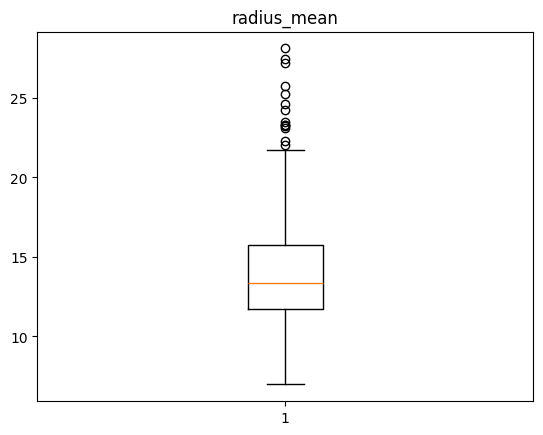

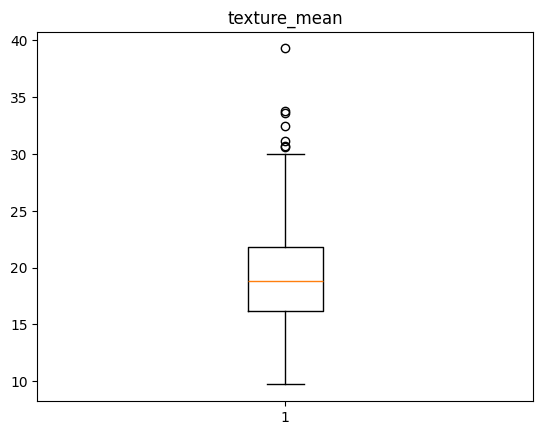

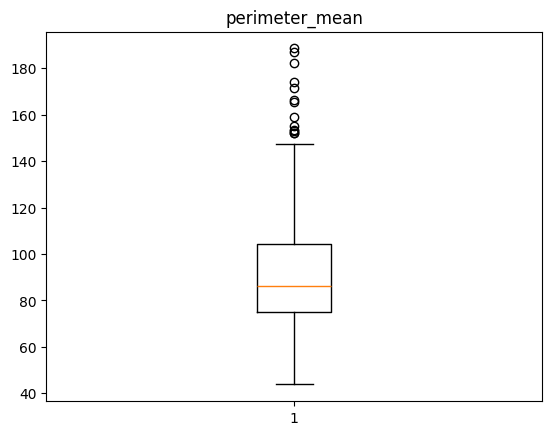

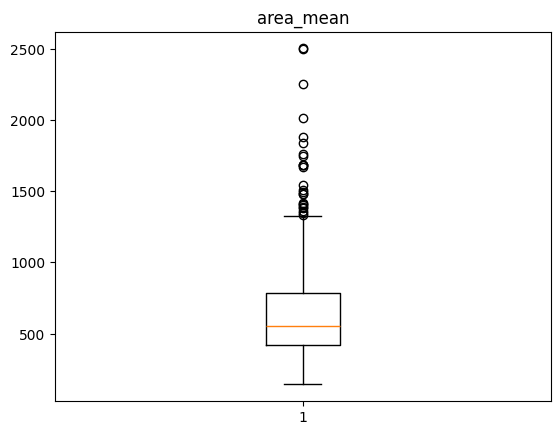

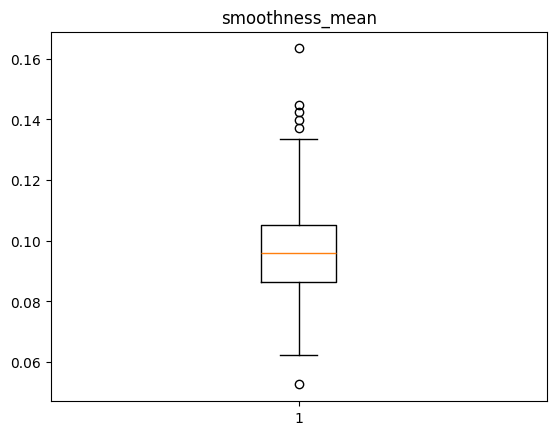

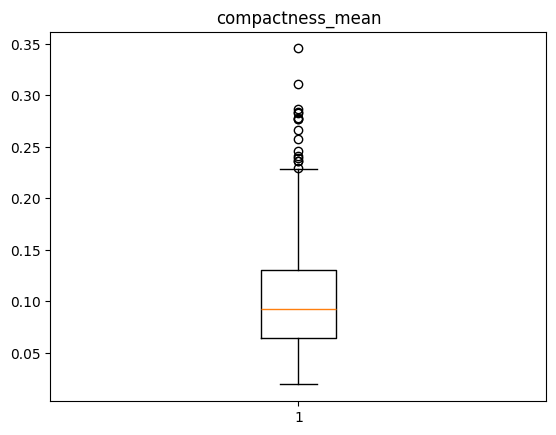

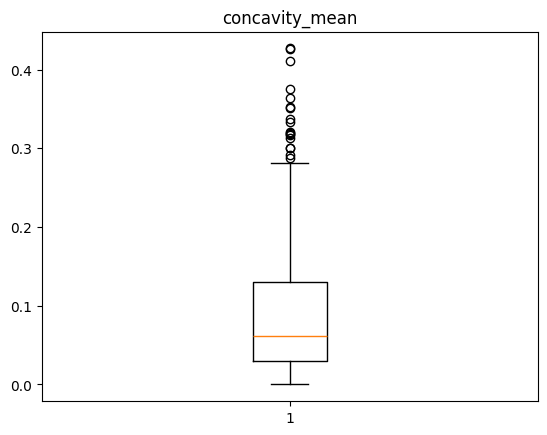

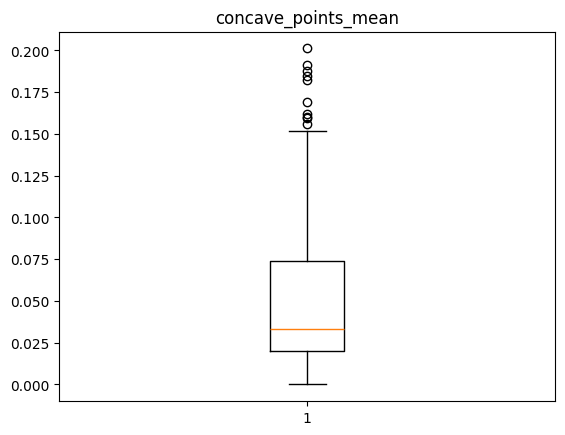

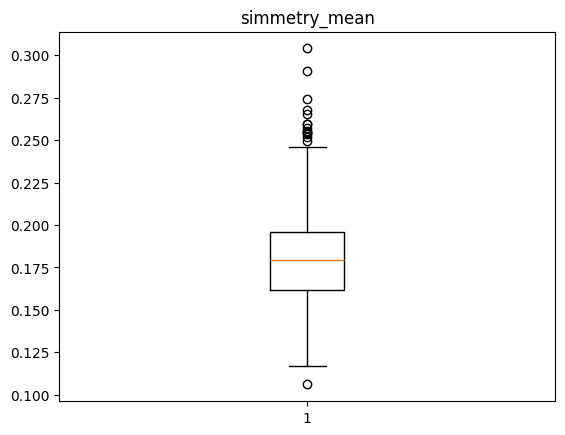

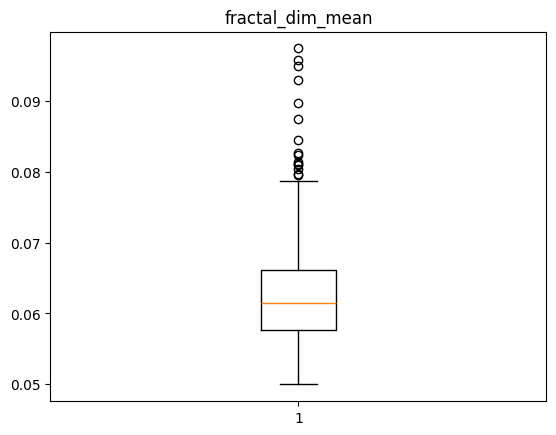

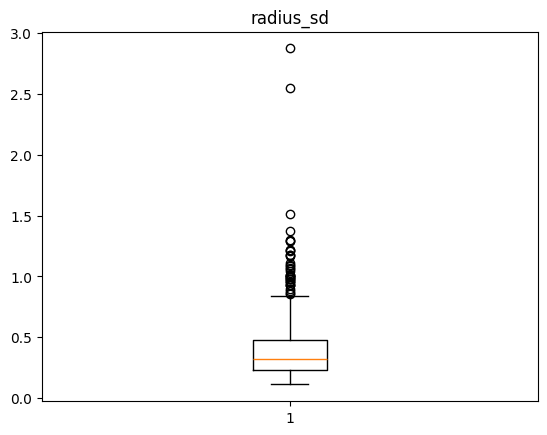

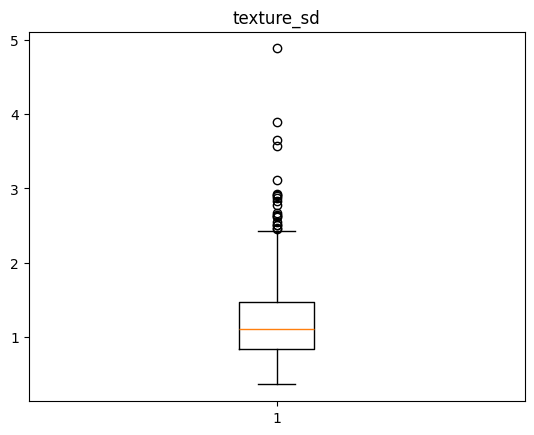

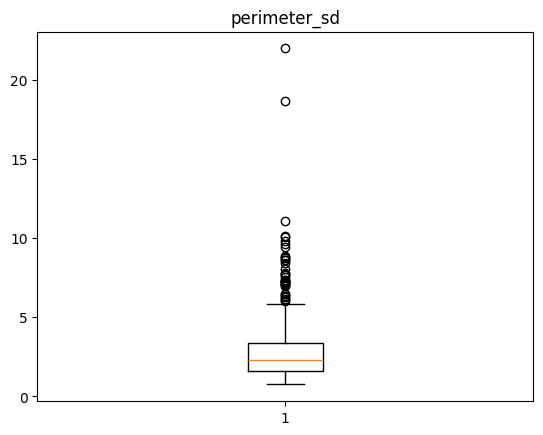

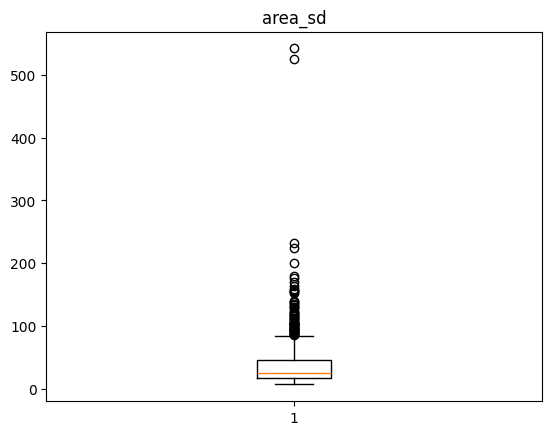

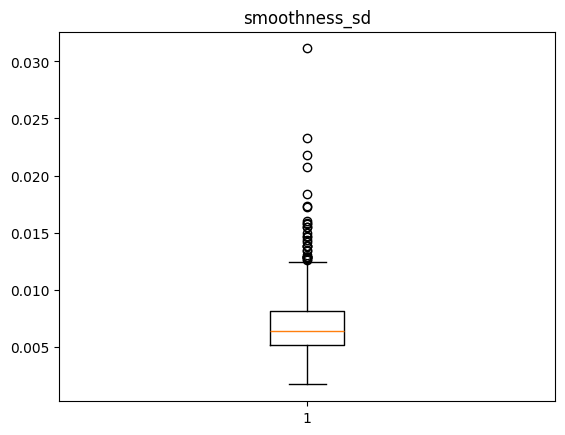

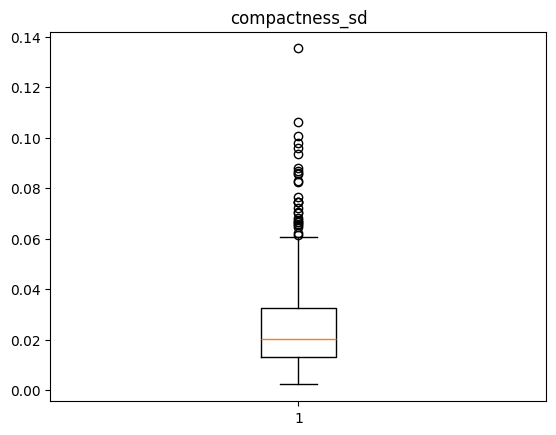

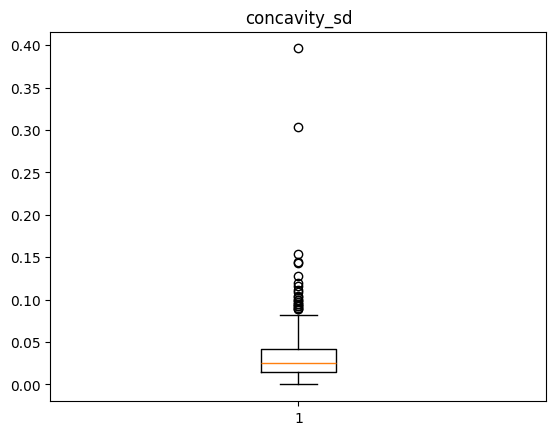

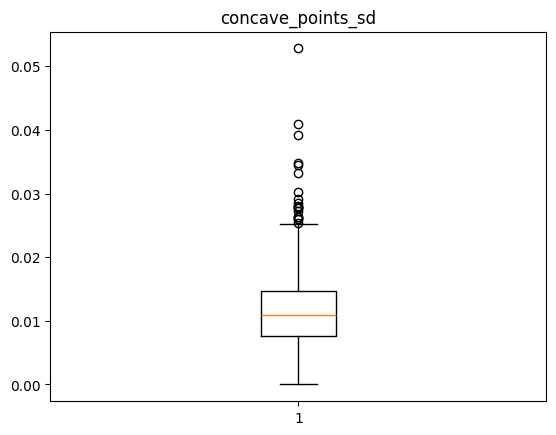

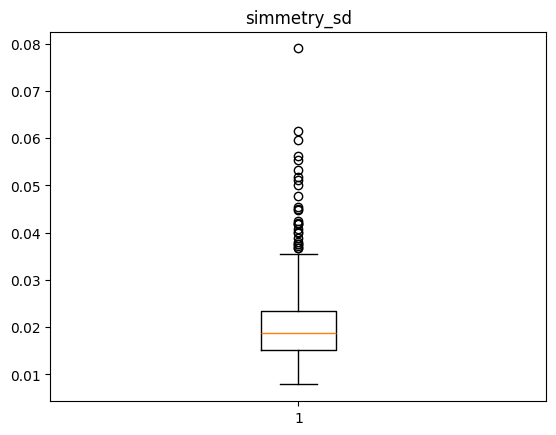

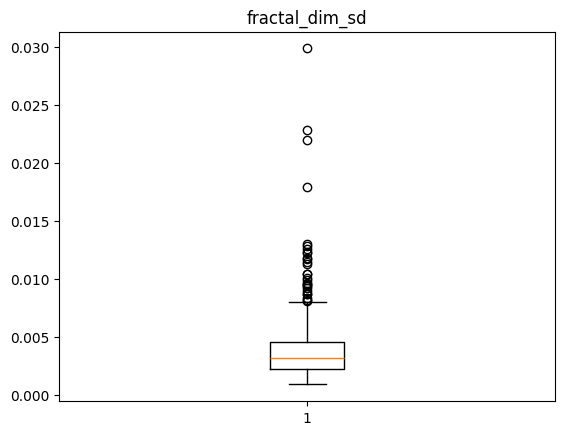

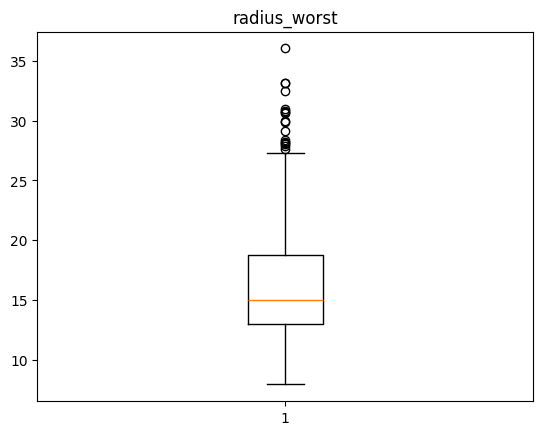

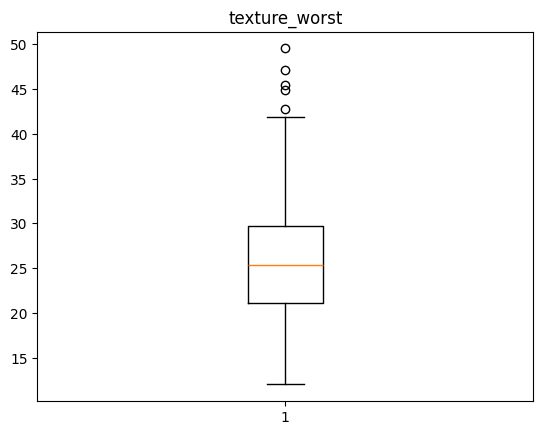

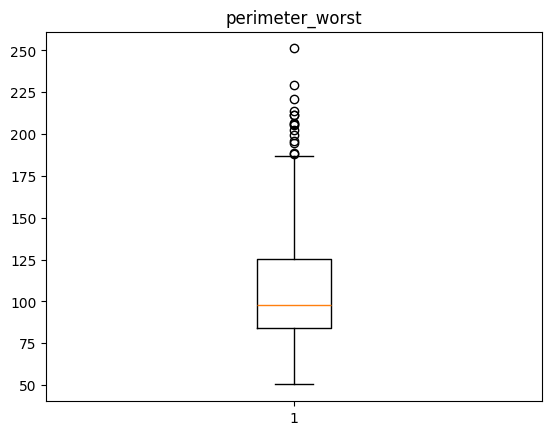

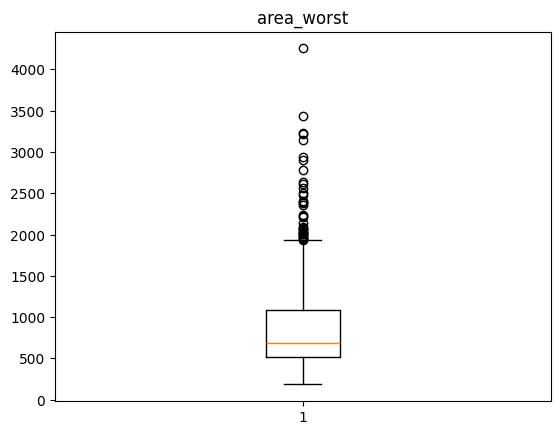

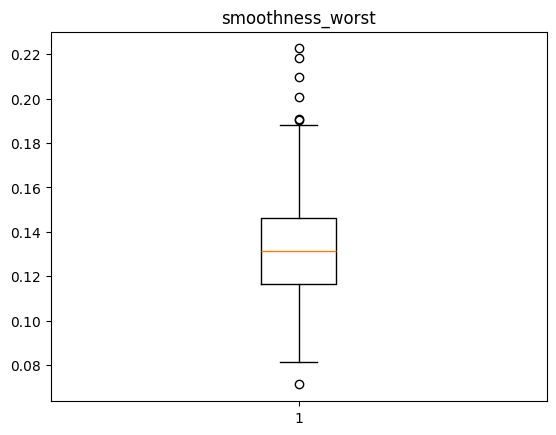

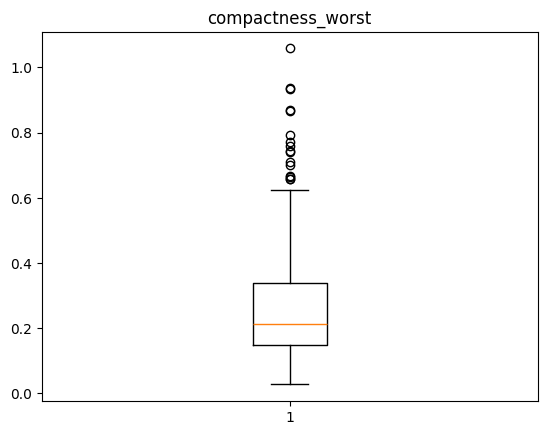

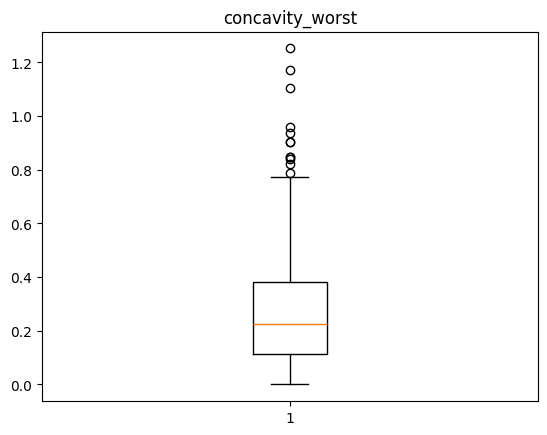

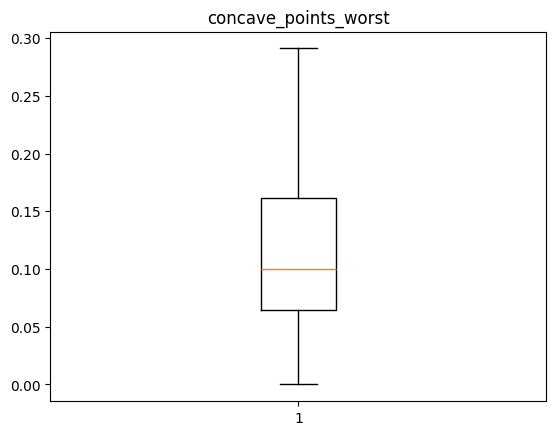

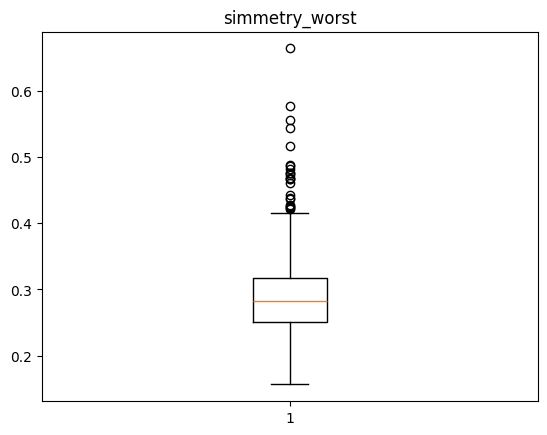

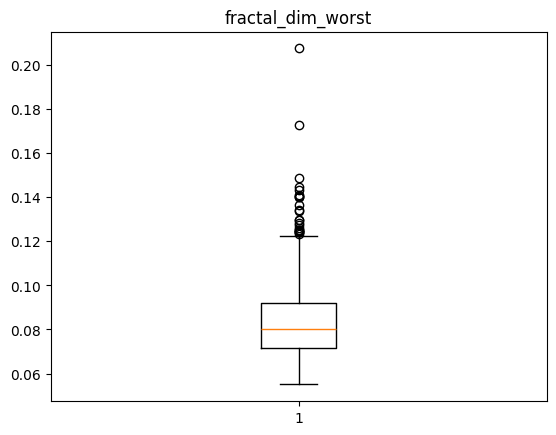

In [16]:
# Son todos datos flotantes sin presencia de nulos. Ahora revisaremos la presencia de outliers
# con medida de quartiles

import matplotlib.pyplot as plt

for i in X.columns:
    plt.boxplot(X[i])
    plt.title(i)
    plt.show()



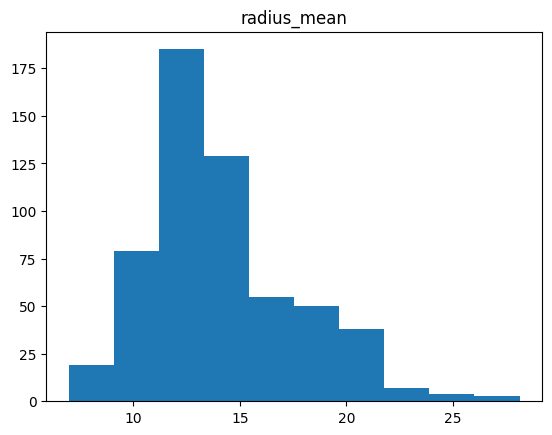

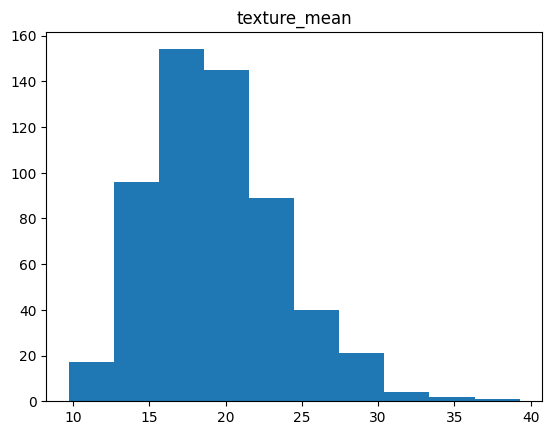

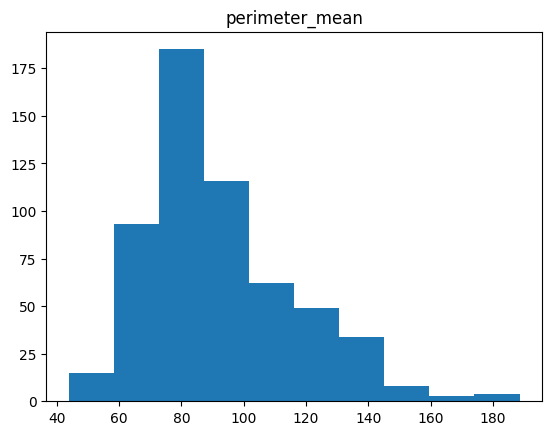

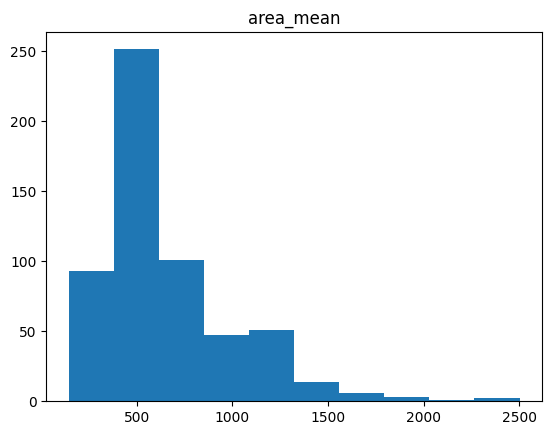

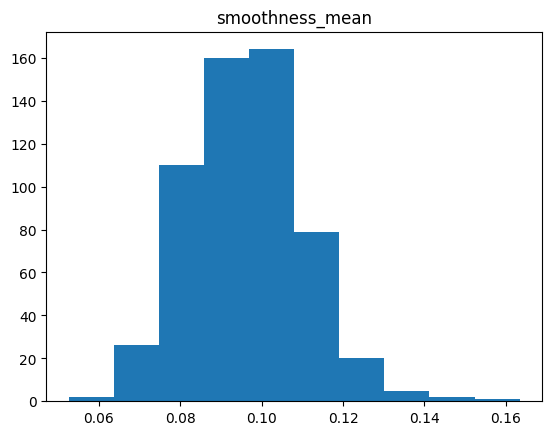

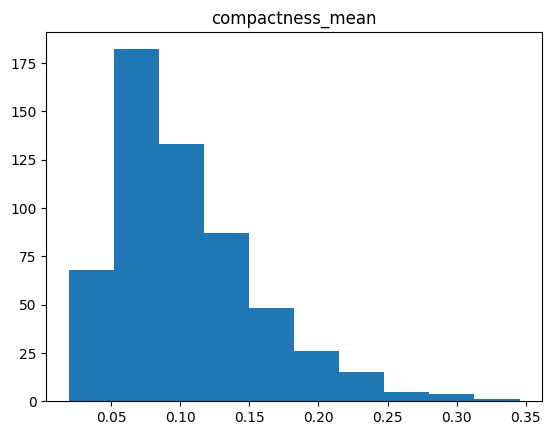

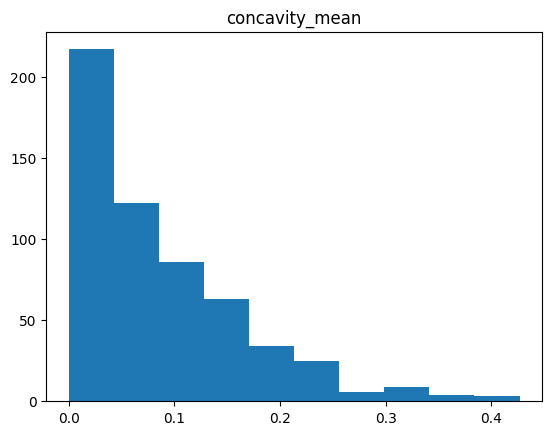

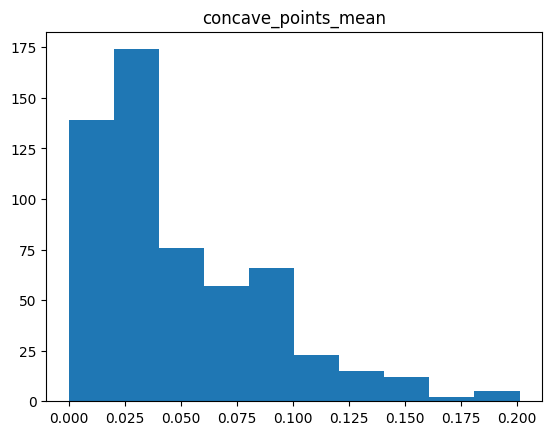

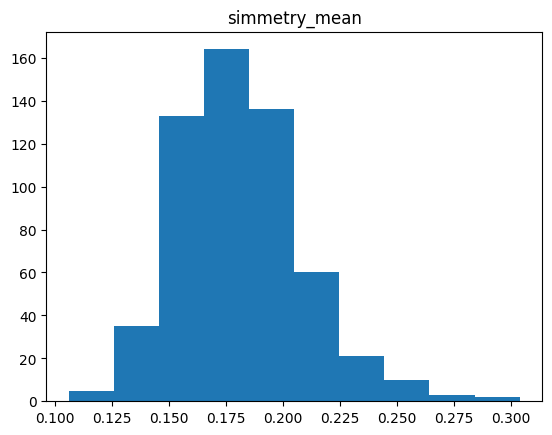

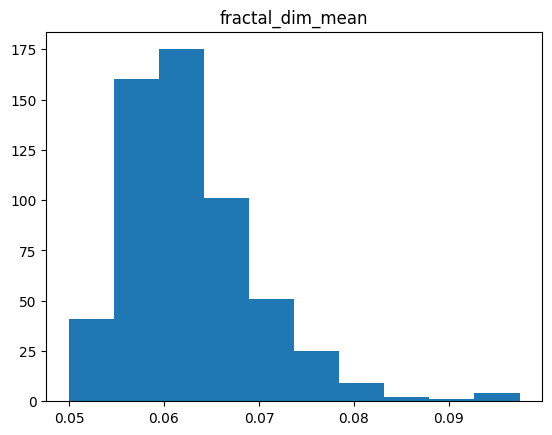

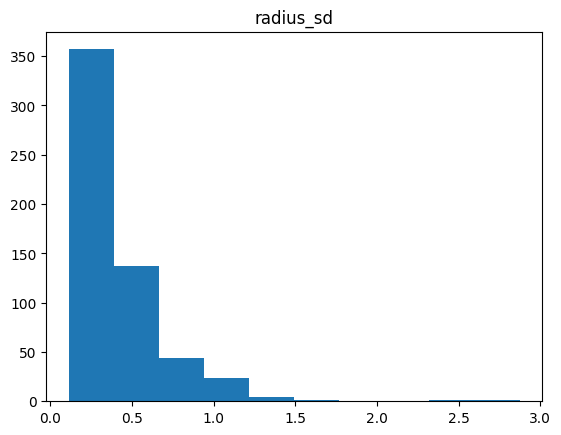

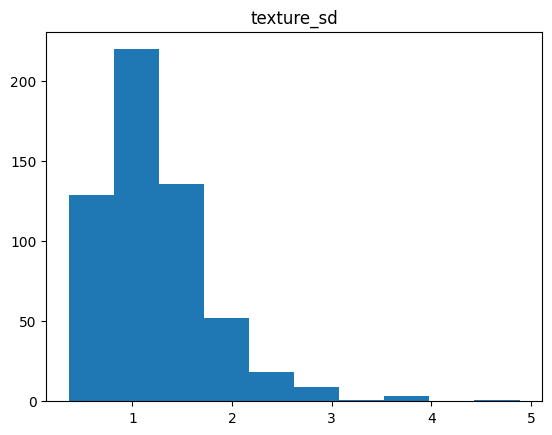

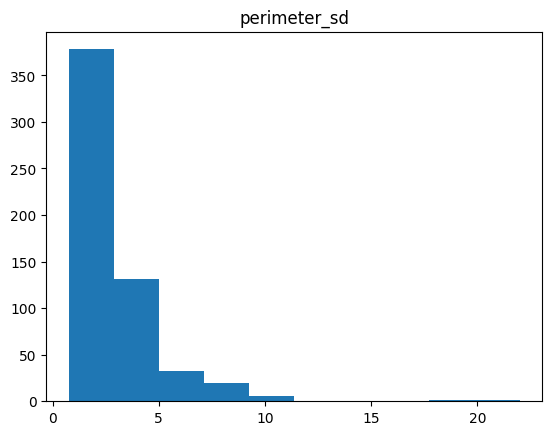

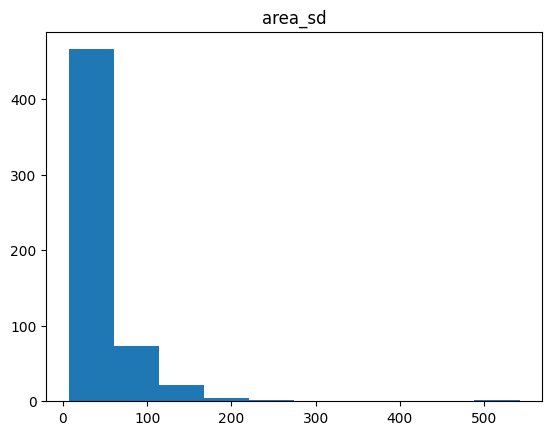

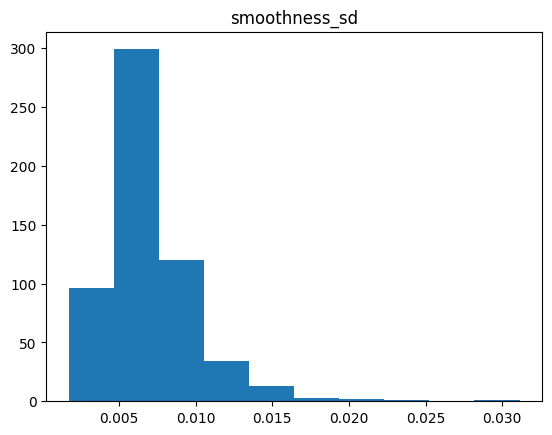

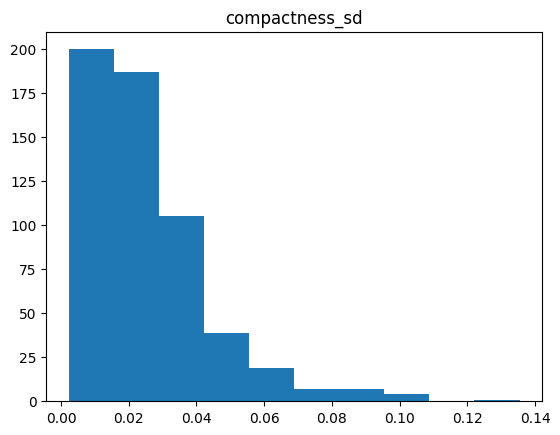

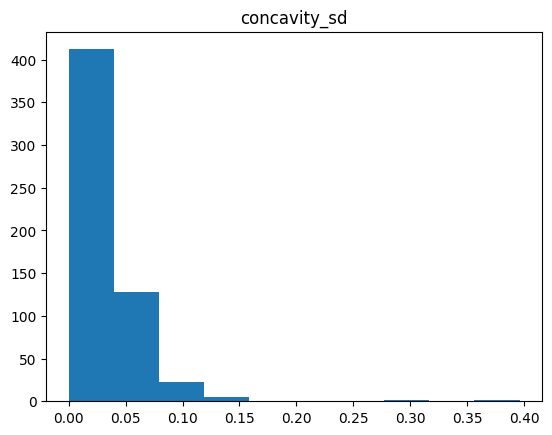

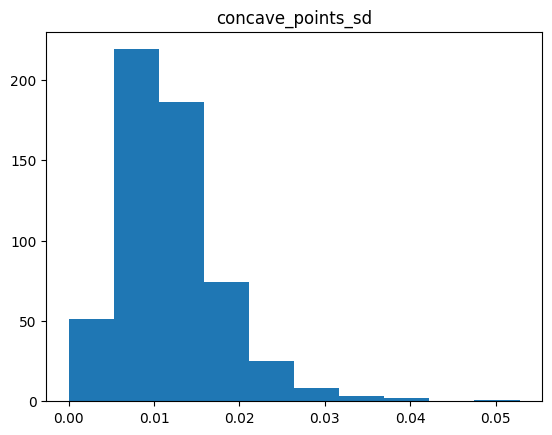

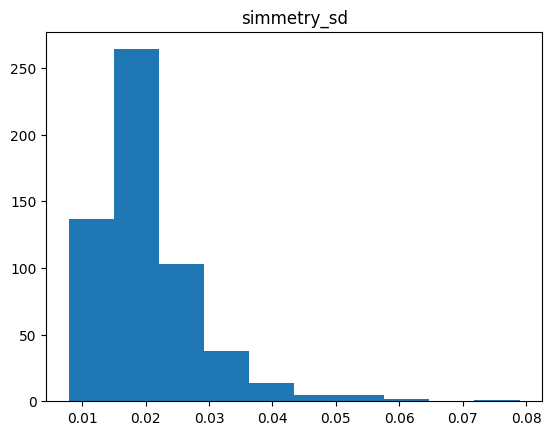

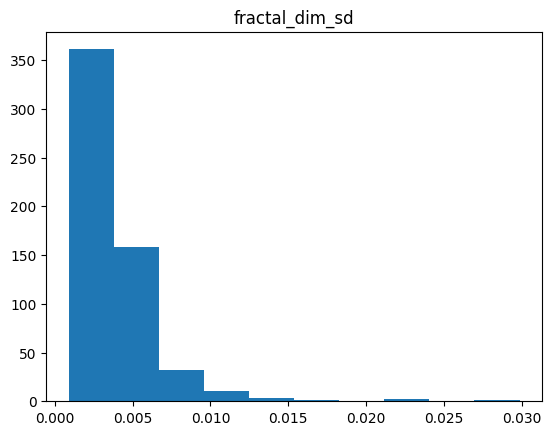

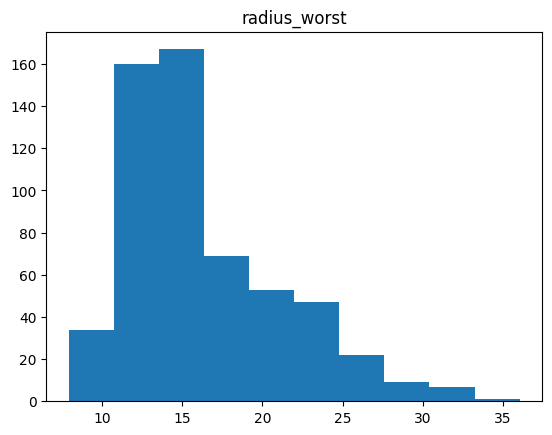

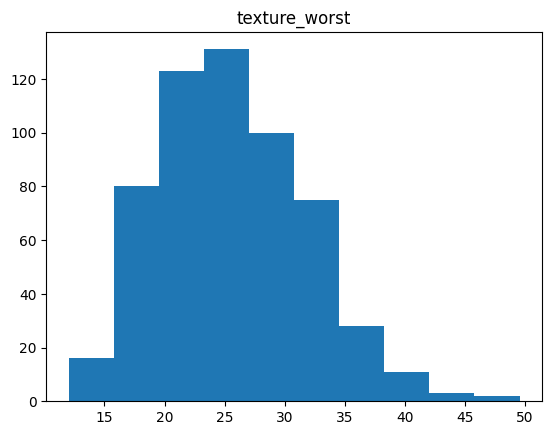

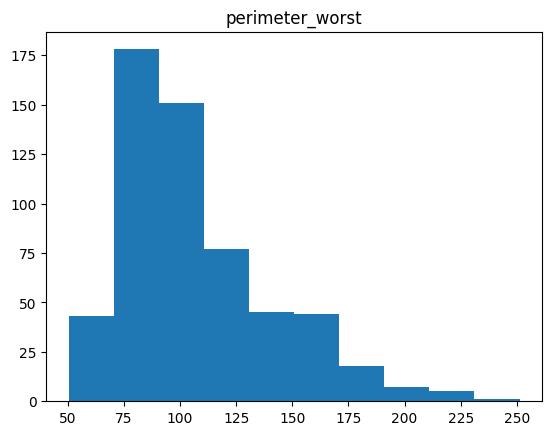

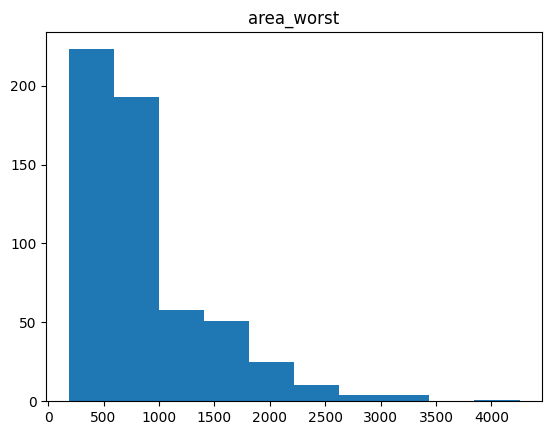

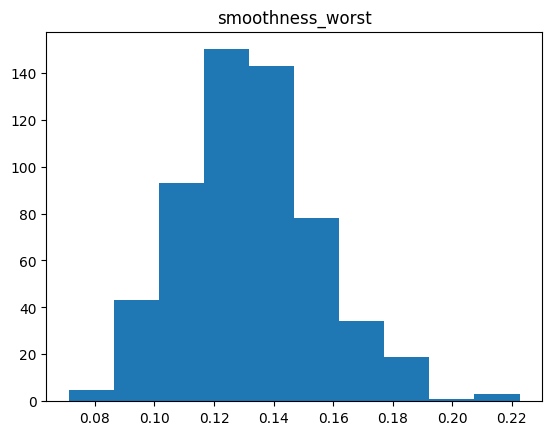

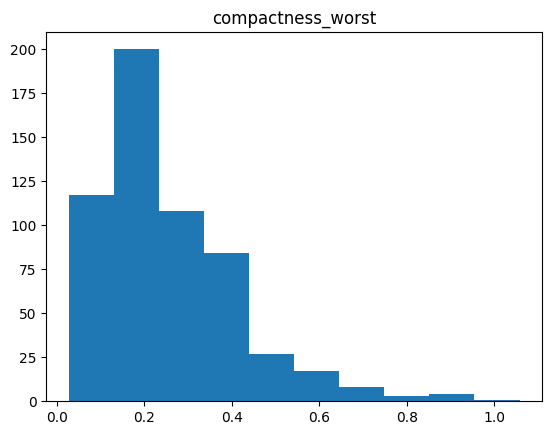

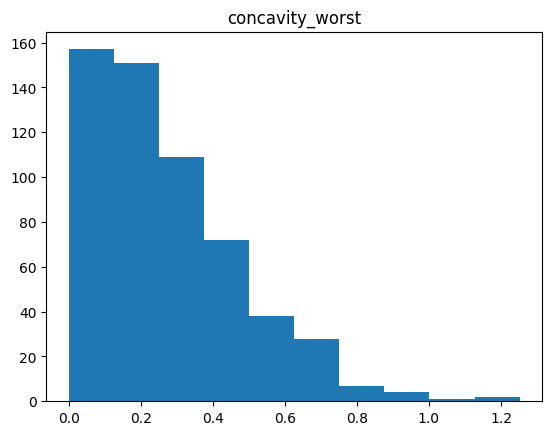

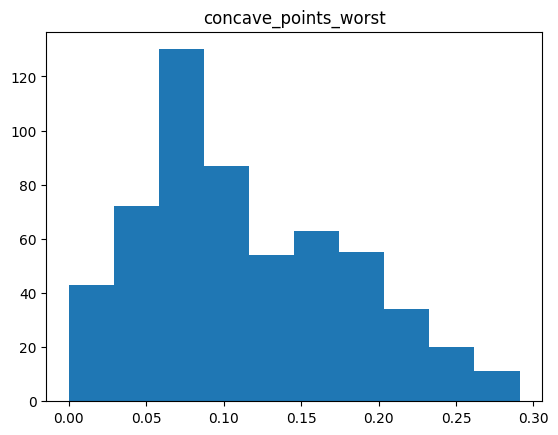

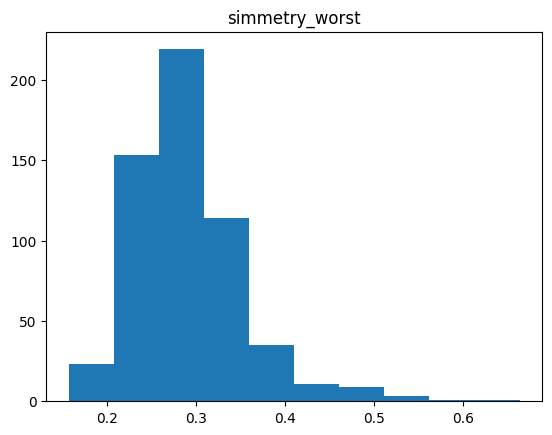

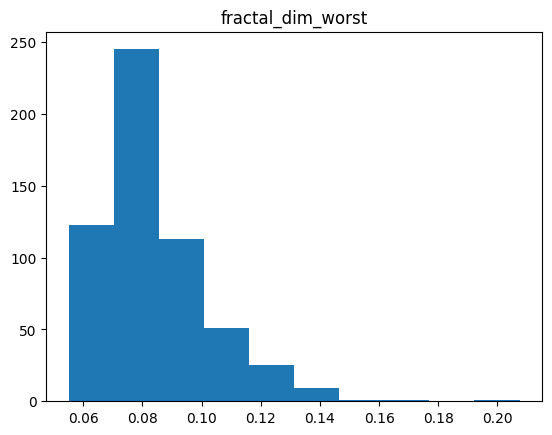

In [17]:
# Dada la cantidad de atípicos observaremos las distribuciones
# del histograma

for i in X.columns:
    plt.hist(X[i])
    plt.title(i)
    plt.show()

In [33]:
# Dadas las características de las variables aplicaremos MinMax
import sklearn.preprocessing as preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
# Eliminaremos los datos que superen los umbrales establecidos por el
# rango intercuartílico

for i in X.columns:
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    # Calculamos una máscara booleana que indica qué filas se mantienen
    mask = (X[i] >= Q1 - 1.5 * IQR) & (X[i] <= Q3 + 1.5 * IQR)

    # Filtramos X e y usando la máscara
    X = X[mask]
    y = y[mask.index]

In [34]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1,
                                                    stratify = y)

In [35]:
# Instanciamos el modelo
modelo = GaussianNB()

# Entrenamos
modelo.fit(X_train, y_train)
# Validamos para entrenamiento y para test
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Miramos la matriz de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Imprimimos
print('Matriz de confusión para el train')
print(cm_train)
print('Matriz de confusión para el test')
print(cm_test)

Matriz de confusión para el train
[[240  10]
 [ 13 135]]
Matriz de confusión para el test
[[105   2]
 [ 10  54]]


In [37]:
# Imprimimos el reporte de desempeño
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           B       0.95      0.96      0.95       250
           M       0.93      0.91      0.92       148

    accuracy                           0.94       398
   macro avg       0.94      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398

              precision    recall  f1-score   support

           B       0.91      0.98      0.95       107
           M       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



#  Base de datos autos


In [44]:

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv('/content/auto-mpg.data-original', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0
405,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0


In [ ]:
dataset['Origin'].unique()

In [46]:
# Haremos un pequeño EDA para conocer los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     406 non-null    float64
 2   Displacement  406 non-null    float64
 3   Horsepower    400 non-null    float64
 4   Weight        406 non-null    float64
 5   Acceleration  406 non-null    float64
 6   Model Year    406 non-null    float64
 7   Origin        406 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [47]:
# Hacemos gestión de datos nulos
dataset.dropna(inplace=True)

In [ ]:
# Me aseguro de haber gestionado los datos nulos
dataset.info()

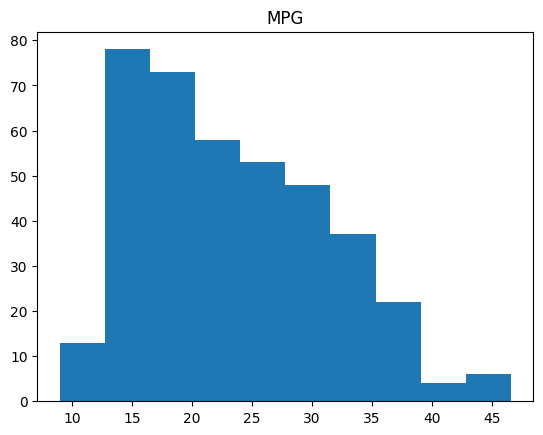

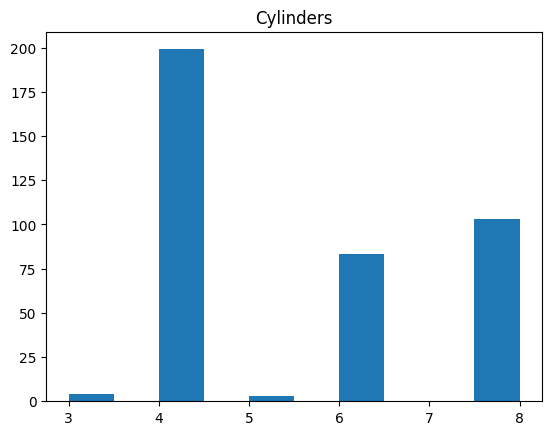

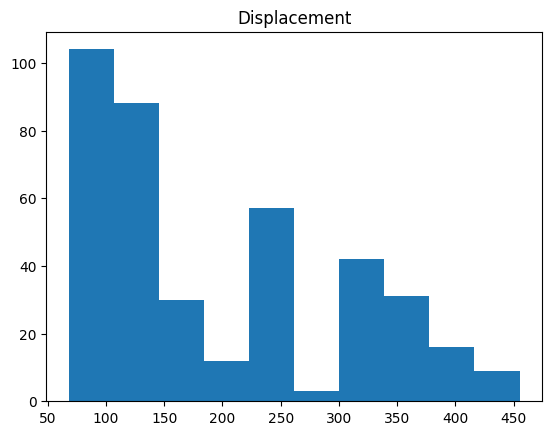

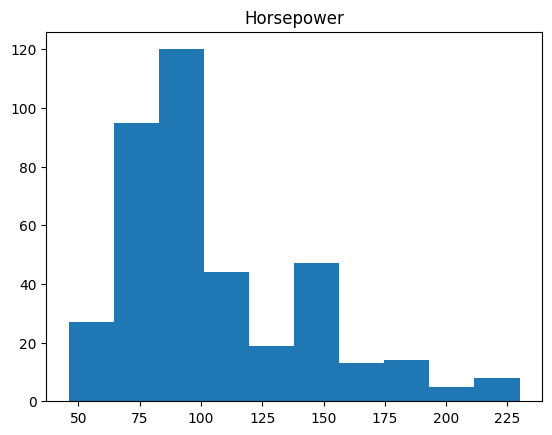

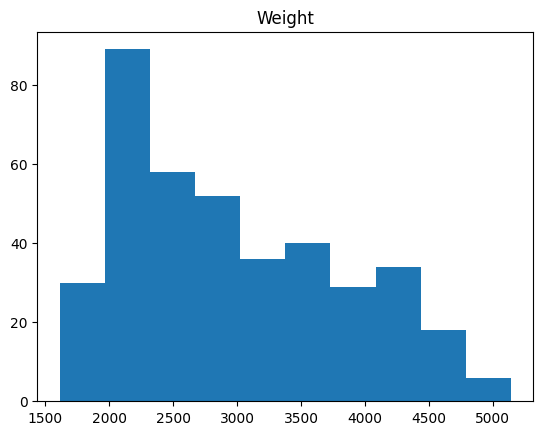

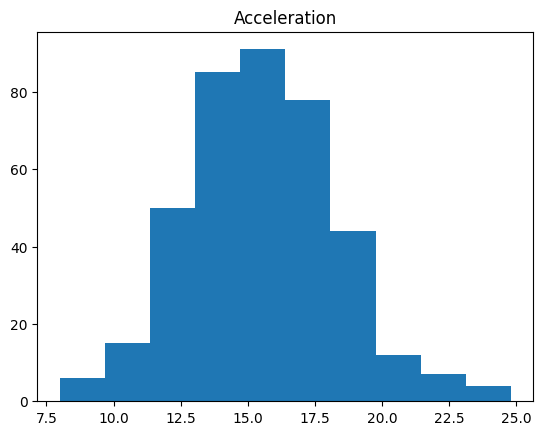

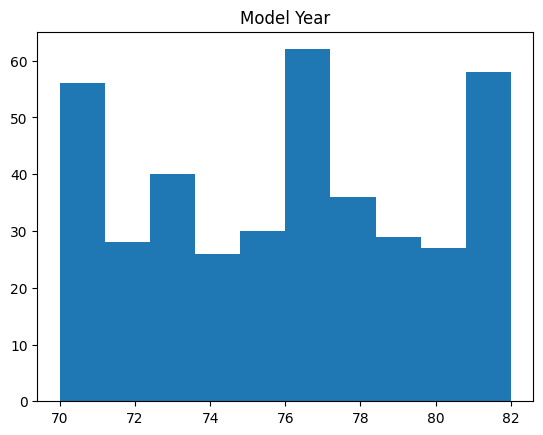

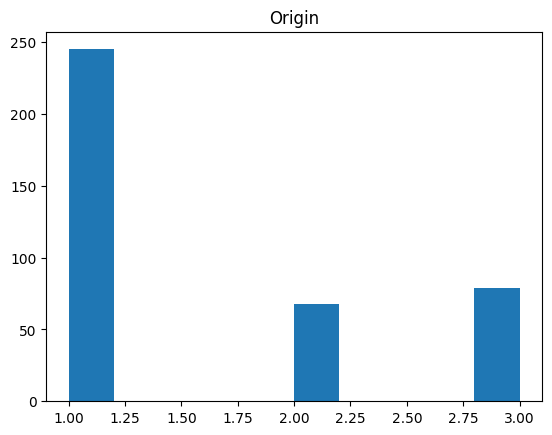

In [50]:
# Visualizo los histogramas para saber qué tipo de preprocesamiento aplicar
for i in dataset.columns:
    plt.hist(dataset[i])
    plt.title(i)
    plt.show()

# Para MPG se puede aplicar estandarización al igual que para la aceleración (aunque esta se puede
# dejar tal como está). Debido a la distribución de las demás, es conveniente hacer una división
# sobre el máximo. En este caso no se hace eliminación de datos atípicos debido a que no
# hay un criterio claro sobre una característica única para tomar la decisión de eliminar
# los datos atípicos.